In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
file_path = 'D:/work/source/kaggle/quora/'
train_df = pd.read_csv(file_path + 'train.csv')
test_df = pd.read_csv(file_path + 'test.csv')
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
sns.set_style('darkgrid')
print(len(np.unique(train_df['qid1'])))
print(len(np.unique(train_df['qid2'])))
print(len(np.unique(train_df['qid1'].tolist())))
print(len(np.unique(train_df['qid1'] + train_df['qid2'])))
print(len(np.unique(train_df['qid1'].tolist() + train_df['qid2'].tolist())))

290654
299364
290654
347345


537933


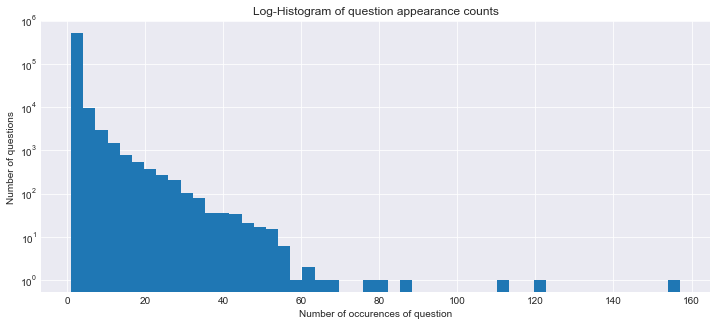

In [7]:
qids = pd.Series(train_df['qid1'].tolist() + train_df['qid2'].tolist())
plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')

In [8]:
# test submission

from sklearn.metrics import log_loss
p = train_df['is_duplicate'].mean()
print('predicted score:', log_loss(train_df['is_duplicate'], np.zeros_like(train_df['is_duplicate']) + p))
test_sub1 = pd.DataFrame({'test_id': test_df['test_id'], 'is_duplicate': p})
test_sub1.to_csv(file_path + 'naive_sub.csv', index=False)
test_sub1.head()

predicted score: 0.658527383984


,is_duplicate,test_id
0,0.369198,0
1,0.369198,1
2,0.369198,2
3,0.369198,3
4,0.369198,4


mean-train:59.82, std-train:31.96, mean-test:60.07, std-test:31.62, max-train:1169.00, max-test:1176.00


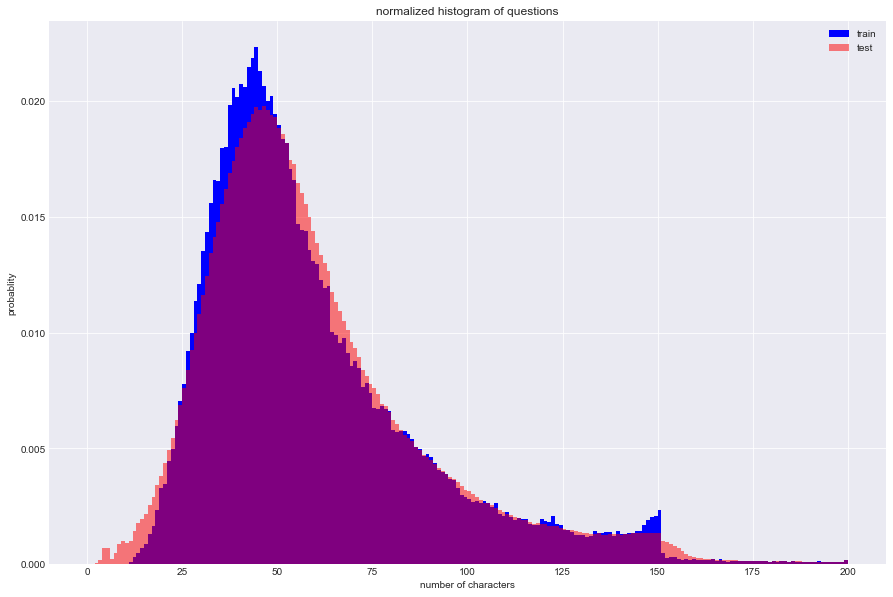

In [9]:
train_qs = pd.Series(train_df['question1'].tolist() + train_df['question2'].tolist()).astype(str)
test_qs = pd.Series(test_df['question1'].tolist() + test_df['question2'].tolist()).astype(str)

dist_train = train_qs.apply(len)
dist_test = test_qs.apply(len)

plt.figure(figsize=(15, 10))
plt.hist(dist_train, 200, (0, 200), color='b', normed=True, label='train')
plt.hist(dist_test, 200, (0, 200), color='r', normed=True, alpha=0.5, label='test')  # normed 表示做成概率密度, alpha 表示透明度
plt.title('normalized histogram of questions')
plt.legend()
plt.xlabel('number of characters')
plt.ylabel('probablity')
print('mean-train:{:.2f}, std-train:{:.2f}, mean-test:{:.2f}, std-test:{:.2f}, max-train:{:.2f}, max-test:{:.2f}'
      .format(dist_train.mean(),
              dist_train.std(),
              dist_test.mean(),
              dist_test.std(),
              dist_train.max(),
              dist_test.max()))